<a href="https://colab.research.google.com/github/CVerka/Homework/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import time

#initialize variables
iris = load_iris()
scaler = StandardScaler()
pca = PCA(0.95)
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [2]:
#load dataset
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#look at descriptive data
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
#dataframe statistics
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]
iris_df.head()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


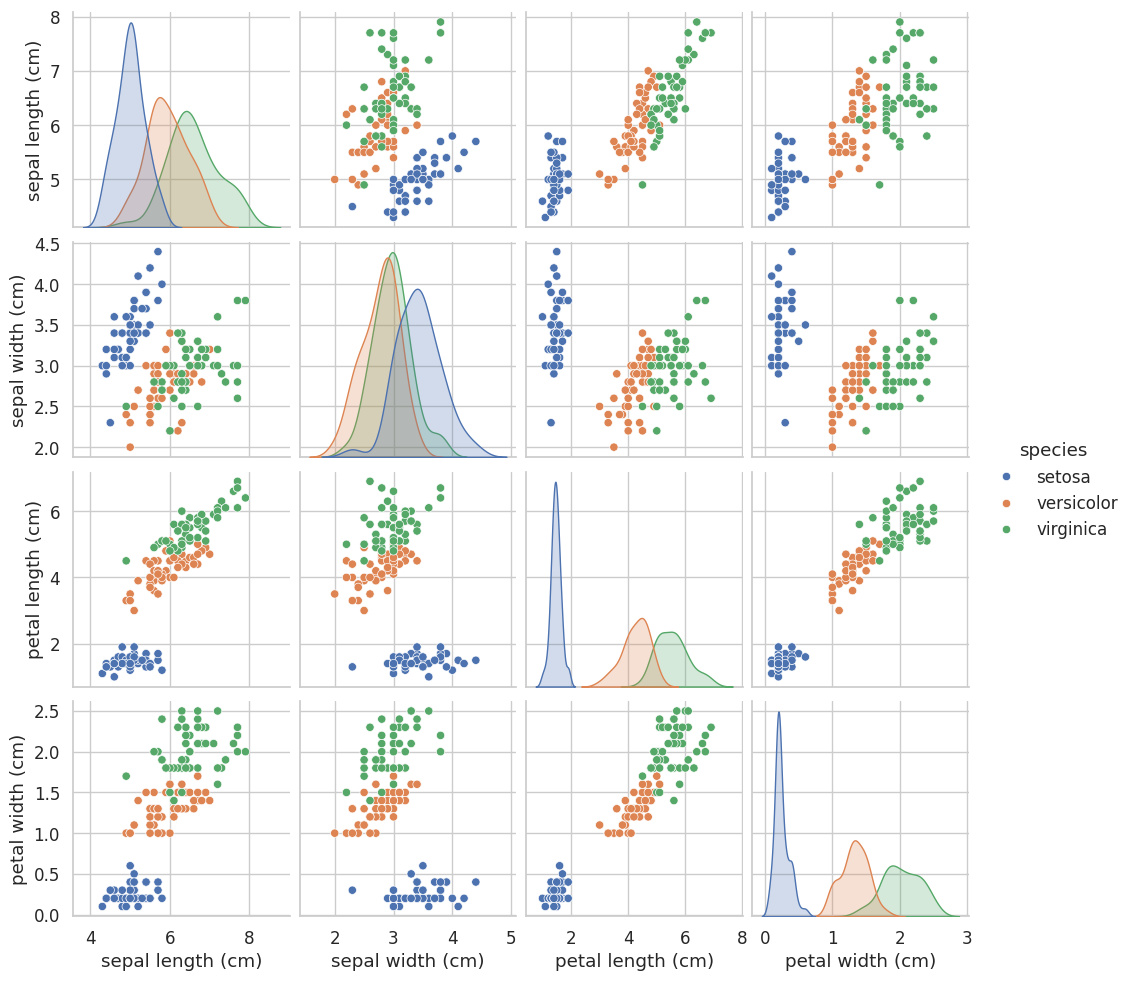

In [5]:
#visualization
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue="species")

In [15]:
#building the model
kmeans = KMeans(n_clusters=3, random_state=11)
K = range(1,10)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(iris.data)


    distortions.append(sum(np.min(cdist(iris.data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / iris.data.shape[0])

    inertias.append(kmeanModel.inertia_)
    mapping1[K] = sum(np.min(cdist(iris.data, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / iris.data.shape[0]
    mapping2[K] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

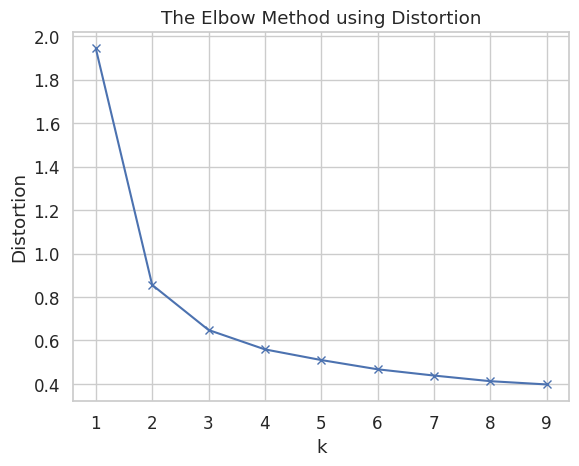

In [17]:
#plotting distortions
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

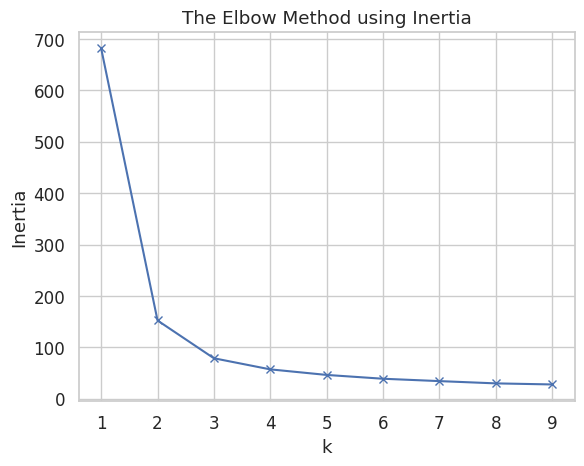

In [18]:
#plotting inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [19]:
#split data for training and testing and fit
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=11)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [21]:
#logistic regression, timer to calculate with PCA and without
timer = time.time()
logisticRegr.fit(X_train_scaled, y_train)
without_PCA = logisticRegr.score(X_test_scaled, y_test)
time_without_PCA = time.time() - timer

timer = time.time()
logisticRegr.fit(X_train_pca, y_train)
with_PCA = logisticRegr.score(X_test_pca, y_test)
time_with_PCA = time.time() - timer

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
#output results
print(f"Without PCA: {without_PCA} Time:{time_without_PCA}")
print(f"With PCA: {with_PCA} Time:{time_with_PCA}")

Without PCA: 0.917 Time:53.48130798339844
With PCA: 0.9248 Time:14.624731540679932
